In [2]:
from freqml.download import *
from freqml import *
import pandas as pd
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
df = read("ETH")

In [4]:
df = df[:1000]

In [5]:
df["b"] = df["price"].iloc[1:] == df["price"].shift().iloc[1:]

In [6]:
df["b"] = df["b"].apply(lambda x: 1 if x else -1)

In [71]:
df["b_EWMA"] = df[["b"]].ewm(alpha=0.05).mean()

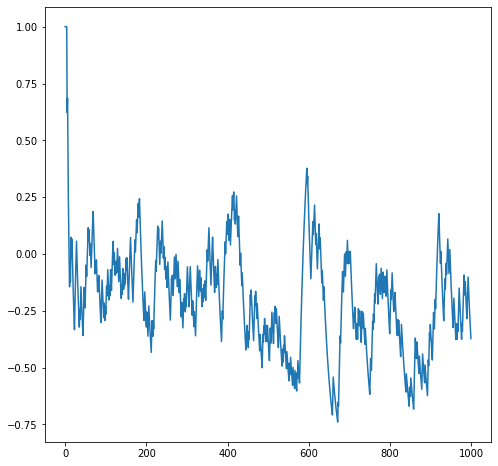

In [72]:
df["b_EWMA"].plot(figsize=(8, 8))

In [16]:
df["theta"] = df["b"].cumsum().abs()

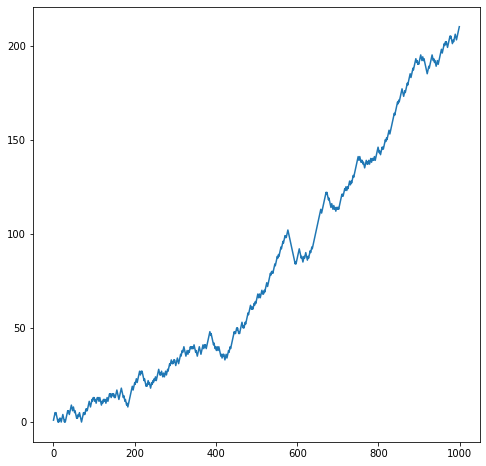

In [33]:
df["theta"].plot(figsize=(8, 8))

In [151]:
df["theta"] = df["b"].cumsum().abs()

In [152]:
T = 40

In [153]:
weighted_sum_T = T

In [154]:
b_border = df["theta"].eq(T).idxmax()

In [155]:
weighted_sum_imbalance = df["b_EWMA"][b_border]

In [156]:
a = np.empty(df.shape[0])
a.fill(T)
df["theta"] -= a
df["theta"].abs()

0       39.0
1       38.0
2       37.0
3       36.0
4       35.0
       ...  
995    166.0
996    167.0
997    168.0
998    169.0
999    170.0
Name: theta, Length: 1000, dtype: float64

In [186]:
b_border = 0
T_list = list()
T = 40
a = np.empty(df.shape[0])
weighted_sum_T = T
weighted_sum_imbalance = 0
df["theta"] = df["b"].cumsum().abs()
df["TIB_idx"] = 0
while True:
    T_list.append(T)
    b_border = df["theta"][b_border:].eq(T).idxmax()
    df["TIB_idx"][b_border:] += 1
    if b_border == 0 or b_border == 999:
        break
    a.fill(T)
    df["theta"] -= a
    df["theta"] = df["theta"].abs()
    weighted_sum_imbalance = df["b_EWMA"][b_border]
    weighted_sum_T = alpha*T + (1-alpha)*weighted_sum_T
    T = np.floor(weighted_sum_T * np.abs(weighted_sum_imbalance))

40
14.0
11.0
13.0
15.0
17.0
19.0
9.0
14.0
9.0
12.0
13.0
11.0
5.0
7.0
6.0
5.0


/home/zoltan/github/freqml/.env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [190]:
grouped = df.groupby("TIB_idx")

In [194]:
df_TIB = df.bars.make_bars(grouped)

TypeError: make_bars() takes 1 positional argument but 2 were given

In [177]:
T_list

[40, 14.0, 15.0, 10.0]

In [157]:
T = np.floor(weighted_sum_T * np.abs(weighted_sum_imbalance))

In [171]:
df["theta"].eq(1000000).idxmax()

0

In [159]:
b_border = df["theta"].eq(T).idxmax()

In [160]:
weighted_sum_imbalance = df["b_EWMA"][b_border]

In [169]:
b_border

475

In [162]:
weighted_sum_imbalance = df["b_EWMA"][b_border]

In [164]:
alpha = 0.1

In [165]:
weighted_sum_T = alpha*T + (1-alpha)*weighted_sum_T

In [166]:
a = np.empty(df.shape[0])
a.fill(T)
df["theta"] -= a
df["theta"].abs()

0       53.0
1       52.0
2       51.0
3       50.0
4       49.0
       ...  
995    152.0
996    153.0
997    154.0
998    155.0
999    156.0
Name: theta, Length: 1000, dtype: float64

In [167]:
T = np.floor(weighted_sum_T * np.abs(weighted_sum_imbalance))

In [168]:
T

11.0